In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
bostom_data = datasets.load_boston()
data_X = bostom_data.data
data_y = bostom_data.target

In [6]:
model = LinearRegression()
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.3)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
X_predict = model.predict(X_test)
model.score(X_test,y_test)

0.666700885965009

Text(0, 0.5, 'y_hat')

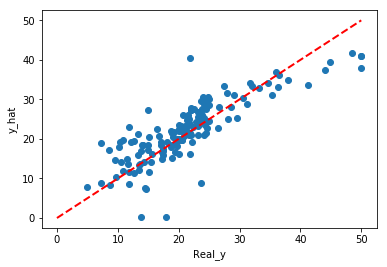

In [8]:
highend = max(max(X_predict),max(y_test))
plt.scatter(y_test,X_predict)
plt.plot([0, highend], [0, highend], color = 'r', linestyle='--',
         linewidth = 2)
plt.xlabel('Real_y')
plt.ylabel('y_hat')
#越接近45度線代表y_hat跟y越接近

In [9]:
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC

In [10]:
X,y  = make_classification(n_samples = 300,n_features = 2,n_informative = 2, n_redundant = 0, 
                          random_state = 22, n_clusters_per_class = 1, scale = 100)

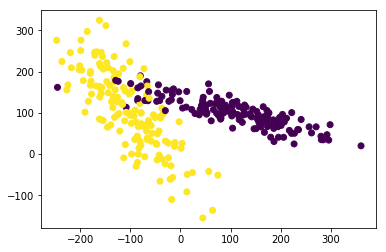

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

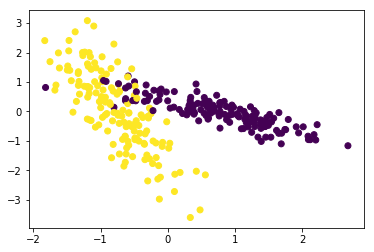

In [12]:
X_norm = preprocessing.scale(X)
plt.scatter(X_norm[:,0],X_norm[:,1],c=y)

In [13]:
cl = SVC()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3)
cl.fit(X_train,y_train)
cl.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4666666666666667

(array([42.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 48.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

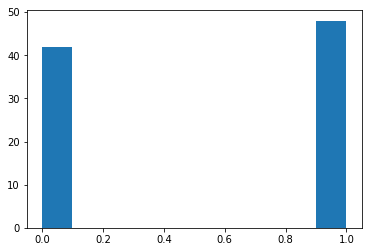

In [15]:
predict = cl.predict(X_test)
accurucy = abs(predict-y_test)
plt.hist(accurucy)

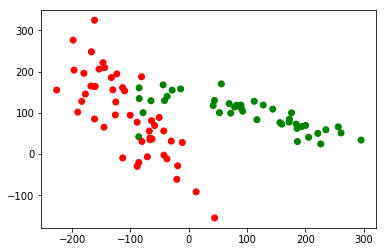

In [16]:
accurucy = list(accurucy)
for i in range(len(accurucy)):
    if accurucy[i] == 0:
        accurucy[i] = 'green'
    else:
        accurucy[i] = 'red' 
plt.scatter(X_test[:,0],X_test[:,1],c=accurucy)

In [18]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm,y,test_size=.3)
clf = SVC()
clf.fit(X_train_norm,y_train)
print(clf.score(X_test_norm, y_test))

0.9222222222222223


D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(array([83.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

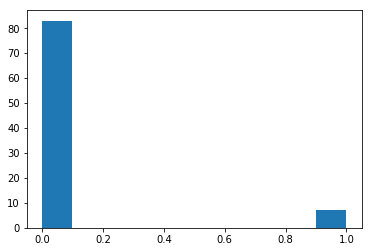

In [19]:
predict = clf.predict(X_test_norm)
accurucy_norm = abs(predict-y_test)
plt.hist(accurucy_norm)

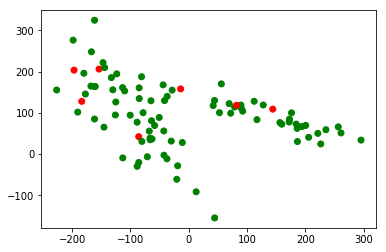

In [20]:
accurucy = list(accurucy_norm)
for i in range(len(accurucy)):
    if accurucy[i] == 0:
        accurucy[i] = 'green'
    else:
        accurucy[i] = 'red'  
plt.scatter(X_test[:,0],X_test[:,1],c=accurucy)

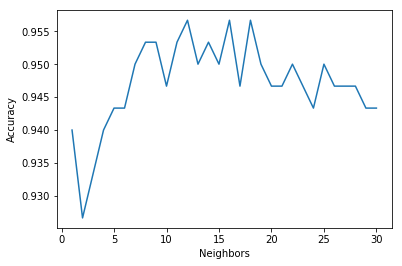

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

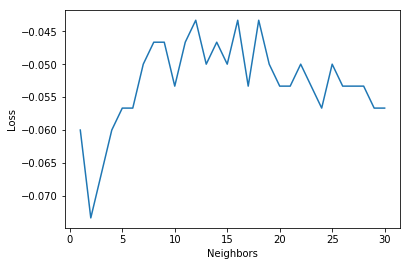

In [24]:
k_loss = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    k_loss.append(loss.mean())
    
plt.plot(k_range,k_loss)
plt.xlabel('Neighbors')
plt.ylabel('Loss')
plt.show()